_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [5]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title"><b>Banner Poles Booking</b></div>

<div class="usecase-authors"><b>Authored by: </b> Jamie Hoang</div>

<div class="usecase-duration"><b>Duration:</b> 60 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

* As a Melbourne business owner, I want to find a suitable location which  to book banners to promote for my events or festival.
* As a council planner, I want to measure the potential streets that have high level of foot traffics to set up more banner poles.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Use the maps to identify areas with a high volume of pedestrian traffic.
- Learn to create interactive maps
- Examine the correlation between the placement of banner poles and pedestrian traffic levels.

<div class="usecase-section-header">Relavant datasets:</div>

- Bookable Banner Poles
- Pedestrian Counting System (counts per hour)
- Pedestrian Counting System - Sensor Locations


#### Import required libraries

In [1]:
import requests
import pandas as pd
from io import StringIO
# pip install geopandas
import geopandas as gpd

#### Data combining 

Load <b>Bookable Banner Poles</b> data set

In [2]:
# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id = 'bookable-banner-poles'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey = "/Users/jamie/Documents/Jamie_MOP/key.txt"
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    banner = pd.read_csv(StringIO(url_content), delimiter=';')
    print(banner.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

     asset_number                                  asset_description  \
135       1110136  Super Banner Pole - Queen St:  Franklin St Cen...   
490       1110403  Standard Banner Pole - Nicholson St: Victoria ...   
503       1109947  Super Banner Pole - Batman Ave: Flinders Stree...   
55        1109969  Super Banner Pole - Therry St: Elizabeth St & ...   
260       1109960  Super Banner Pole - Batman Ave: Near Willam Ba...   
687       1109902                    Banner Pole - Super Banner Pole   
139       1110081                    Banner Pole - Super Banner Pole   
556       1110132  Super Banner Pole - Queen St:  Franklin St Cen...   
311       1110417  Standard Banner Pole - Errol St: Victoria St -...   
567       1110193  Standard Banner Pole - Collins St: Elizabeth S...   

     banner_pole_type  book_group             model_descr_lupvalue  \
135               2.0        74.0  Banner Pole - Super Banner Pole   
490               6.0        71.0    Banner Pole - Standard Banner 

In [3]:
print(f'The dataset has', len(banner) ,'records.')
banner.head()

The dataset has 859 records.


,asset_number,asset_description,banner_pole_type,book_group,model_descr_lupvalue,model_no_lupvalue,lat,lon,location
0,1110157,Banner Pole - Super Banner Pole,2.0,17.0,Banner Pole - Super Banner Pole,310101-001,-37.823292,144.988663,"-37.82329155263138, 144.98866256674287"
1,1109877,Banner Pole - Super Banner Pole,2.0,92.0,Banner Pole - Super Banner Pole,310101-001,-37.817254,144.967254,"-37.817254228279225, 144.9672540044011"
2,1110079,Banner Pole - Super Banner Pole,2.0,58.0,Banner Pole - Super Banner Pole,310101-001,-37.801522,144.957055,"-37.80152225386091, 144.9570553422455"
3,1110078,Banner Pole - Super Banner Pole,2.0,58.0,Banner Pole - Super Banner Pole,310101-001,-37.801494,144.957063,"-37.80149363625414, 144.95706283173402"
4,1110112,Banner Pole - Super Banner Pole,2.0,59.0,Banner Pole - Super Banner Pole,310101-001,-37.801071,144.957135,"-37.80107087696859, 144.9571345615933"


Load <b>Pedestrian Counting System (counts per hour)</b> data set

In [4]:
# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey = "/Users/jamie/Documents/Jamie_MOP/key.txt"
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian = pd.read_csv(StringIO(url_content), delimiter=';')
    print(pedestrian.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

       sensor_name                  timestamp  locationid  direction_1  \
299310    Fra118_T  2023-09-12T04:00:00+00:00          51          138   
273077    HarEsP_T  2023-06-26T08:00:00+00:00          77          113   
230538    WatCit_T  2023-08-12T07:00:00+00:00          11           17   
545967   Errol23_T  2024-03-12T17:00:00+00:00          87            3   
41658     574Qub_T  2023-04-27T14:00:00+00:00          86            7   
311686     Col15_T  2023-09-16T23:00:00+00:00          17          109   
503749    Lon364_T  2024-03-03T06:00:00+00:00          56          305   
362060      NewQ_T  2024-01-27T00:00:00+00:00          12          191   
90696       QVMQ_T  2023-04-08T18:00:00+00:00          48            4   
340770    SprFli_T  2023-05-29T20:00:00+00:00          75           24   

        direction_2  total_of_directions                    location  
299310          127                  265  -37.80841815, 144.95906316  
273077           91                  204  -

In [5]:
print(f'The dataset has', len(pedestrian) ,'records.')
pedestrian.head()

The dataset has 549976 records.


,sensor_name,timestamp,locationid,direction_1,direction_2,total_of_directions,location
0,Fra118_T,2023-06-05T17:00:00+00:00,51,1,4,5,"-37.80841815, 144.95906316"
1,Fra118_T,2023-06-05T18:00:00+00:00,51,7,5,12,"-37.80841815, 144.95906316"
2,Fra118_T,2023-06-05T20:00:00+00:00,51,10,22,32,"-37.80841815, 144.95906316"
3,Fra118_T,2023-06-06T01:00:00+00:00,51,94,136,230,"-37.80841815, 144.95906316"
4,Fra118_T,2023-06-06T02:00:00+00:00,51,166,126,292,"-37.80841815, 144.95906316"


Load <b>Pedestrian Counting System - Sensor Locations</b> data set

In [6]:
# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id = 'pedestrian-counting-system-sensor-locations'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey = "/Users/jamie/Documents/Jamie_MOP/key.txt"
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_code = pd.read_csv(StringIO(url_content), delimiter=';')
    print(pedestrian_code.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

     location_id                                 sensor_description  \
91             4                                   Town Hall (West)   
37           158                               514 Elizebeth Street   
0             24                      Spencer St-Collins St (North)   
28           110                          Birrarung Marr East Entry   
97            19                      Chinatown-Swanston St (North)   
26           107                           Flagstaff station (East)   
134          151  narrm ngarrgu Library - Level 2 - Collections ...   
108           54                            Lincoln-Swanston (West)   
99            26                      QV Market-Elizabeth St (West)   
89           155  narrm ngarrgu Library - Level 3 Children's Lib...   

       sensor_name installation_date                         note  \
91        Swa123_T        2009-03-23                          NaN   
37        Eli514_T        2024-01-29                          NaN   
0         C

In [7]:
print(f'The dataset has', len(pedestrian_code) ,'records.')
pedestrian_code.head()

The dataset has 138 records.


,location_id,sensor_description,sensor_name,installation_date,note,location_type,status,direction_1,direction_2,latitude,longitude,location
0,24,Spencer St-Collins St (North),Col620_T,2013-09-02,NaN,Outdoor,A,East,West,-37.818880,144.954492,"-37.81887963, 144.95449198"
1,25,Melbourne Convention Exhibition Centre,MCEC_T,2013-08-28,NaN,Outdoor,A,East,West,-37.824018,144.956044,"-37.82401776, 144.95604426"
2,36,Queen St (West),Que85_T,2015-01-20,"Pushbox Upgrade, 03/08/2023",Outdoor,A,North,South,-37.816525,144.961211,"-37.81652527, 144.96121062"
3,37,Lygon St (East),Lyg260_T,2015-02-11,"Pushbox Upgrade, 30/06/2023",Outdoor,A,North,South,-37.803103,144.966715,"-37.80310271, 144.96671451"
4,41,Flinders La-Swanston St (West),Swa31,2017-06-29,NaN,Outdoor,A,North,South,-37.816686,144.966897,"-37.81668634, 144.96689733"


Extract the sensor location

In [8]:
location = pedestrian.merge(pedestrian_code[['sensor_description','location_type', 'sensor_name']], 
                 how = 'left', 
                 on = 'sensor_name')

In [9]:
map = gpd.GeoDataFrame(pedestrian_code, geometry=gpd.points_from_xy(pedestrian_code.longitude, pedestrian_code.latitude), crs="EPSG:4326")
map.head()


,location_id,sensor_description,sensor_name,installation_date,note,location_type,status,direction_1,direction_2,latitude,longitude,location,geometry
0,24,Spencer St-Collins St (North),Col620_T,2013-09-02,NaN,Outdoor,A,East,West,-37.818880,144.954492,"-37.81887963, 144.95449198",POINT (144.95449 -37.81888)
1,25,Melbourne Convention Exhibition Centre,MCEC_T,2013-08-28,NaN,Outdoor,A,East,West,-37.824018,144.956044,"-37.82401776, 144.95604426",POINT (144.95604 -37.82402)
2,36,Queen St (West),Que85_T,2015-01-20,"Pushbox Upgrade, 03/08/2023",Outdoor,A,North,South,-37.816525,144.961211,"-37.81652527, 144.96121062",POINT (144.96121 -37.81653)
3,37,Lygon St (East),Lyg260_T,2015-02-11,"Pushbox Upgrade, 30/06/2023",Outdoor,A,North,South,-37.803103,144.966715,"-37.80310271, 144.96671451",POINT (144.96671 -37.80310)
4,41,Flinders La-Swanston St (West),Swa31,2017-06-29,NaN,Outdoor,A,North,South,-37.816686,144.966897,"-37.81668634, 144.96689733",POINT (144.96690 -37.81669)


#### Data Visualization

In [64]:
com = gpd.read_file('/Users/jamie/Documents/GitHub/MOP-Code/Playground/jamie/postcodes')

<AxesSubplot:>

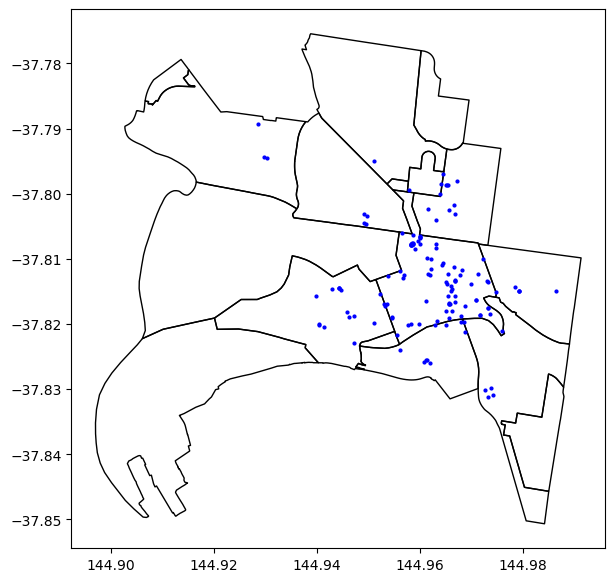

In [74]:
#Mapping all pedestrian sensors

ax = com.plot(figsize=(7,7), color='none')
map.plot(ax=ax, color="blue", markersize=4)

In [69]:
banner_map = gpd.GeoDataFrame(banner, geometry=gpd.points_from_xy(banner.lon, banner.lat), crs="EPSG:4326")

<AxesSubplot:>

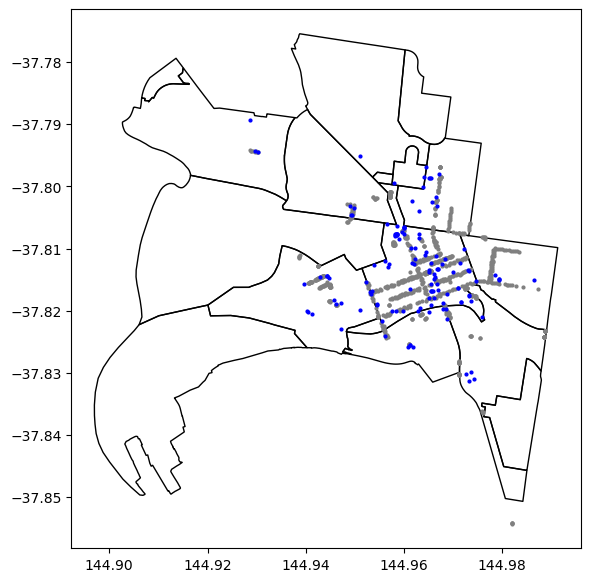

In [75]:
#Mapping all bookable banner poles

ax = com.plot(figsize=(7,7), color='none')
banner_map.plot(ax=ax, color="grey", markersize=4)
map.plot(ax=ax, color="blue", markersize=4)

***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```